# Introduction

The objective of this project is to predict the monthly closing stock price of Yes Bank using historical stock data. The dataset contains important financial indicators like the opening price, highest price, lowest price, and the closing price recorded each month since the bank’s inception.

We aim to develop regression models that can learn from past trends and forecast future closing prices accurately. In this project, we:

Perform data cleaning to handle missing values and outliers.

Conduct exploratory data analysis (EDA) to understand variable relationships.

Apply feature engineering techniques to improve model performance.

Train multiple regression models including Linear Regression, Decision Tree Regressor, Random Forest Regressor, Support Vector Regressor, and K-Nearest Neighbors Regressor.

Evaluate models using standard regression metrics such as MAE, MSE, RMSE, R² Score, and Adjusted R² Score.

Perform Cross-validation to ensure the models are reliable and not overfitting.

By the end of this project, we aim to identify the most suitable model for predicting Yes Bank’s closing stock price, thereby providing useful insights for better financial forecasting and investment planning.

In [ ]:
Importing Libraries

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Load Data 

In [6]:
df = pd.read_csv("C:\\Users\\Aditi Pawar\\Downloads\\data_YesBank.csv")
df.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


### Data Cleaning

In [7]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [8]:
df.shape

(185, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [10]:
df["Date"] = pd.to_datetime(df["Date"],format="%b-%y")
df["Date"] = df["Date"].dt.strftime('%b-%y')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [13]:
df.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [14]:
df.duplicated().sum()

0

## Exploratory Data Analysis

1) Univariate analysis
i.e.analyzing single variable at a time

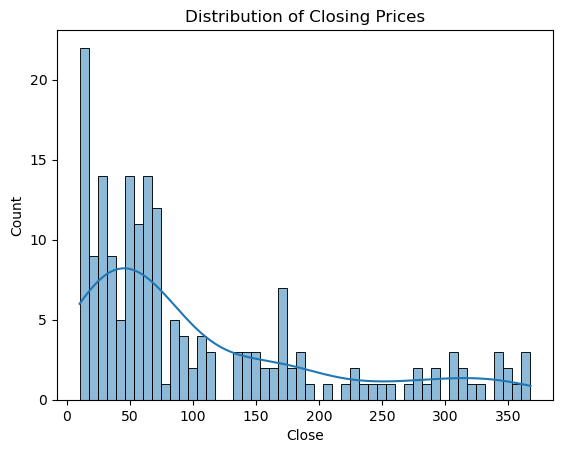

In [15]:
sns.histplot(df['Close'],bins=50,kde=True)
plt.title("Distribution of Closing Prices")
plt.show()


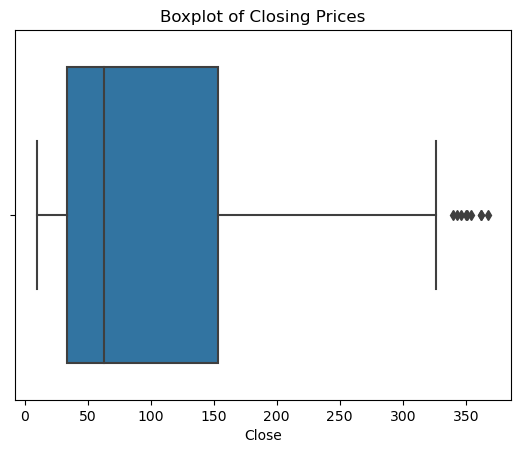

In [16]:
sns.boxplot(x=df["Close"])
plt.title("Boxplot of Closing Prices")
plt.show()

<Axes: xlabel='Date'>

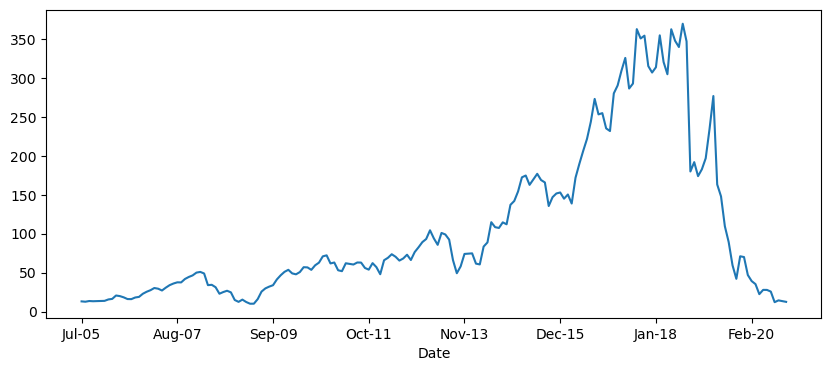

In [17]:
df.set_index('Date', inplace = True)
df["Open"].plot(figsize=(10,4))

<Axes: xlabel='Date'>

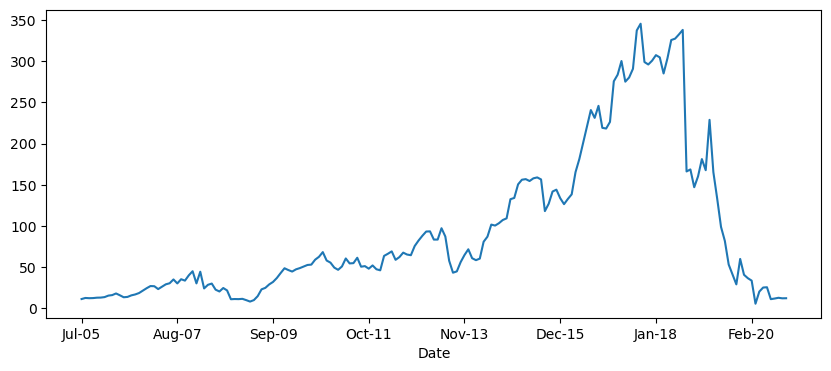

In [18]:
df["Low"].plot(figsize=(10,4))

<Axes: xlabel='Date'>

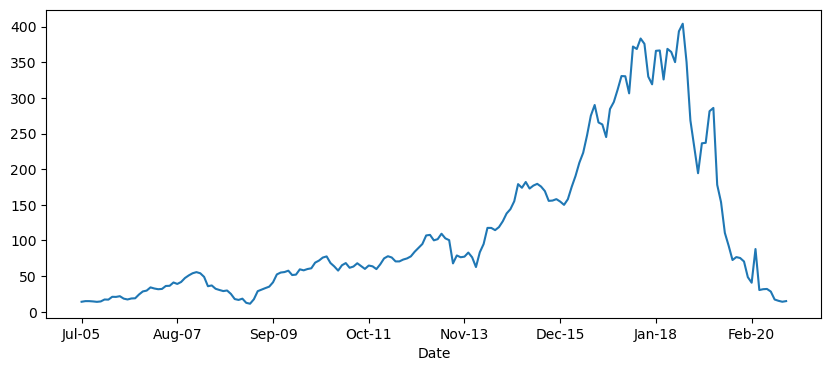

In [19]:
df["High"].plot(figsize=(10,4))

<Axes: xlabel='Date'>

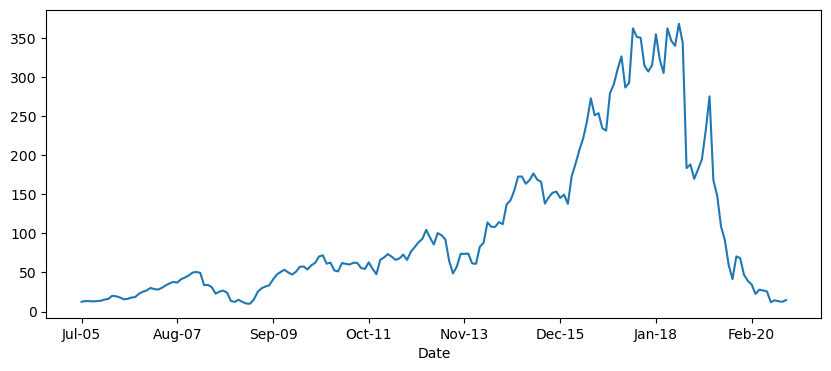

In [20]:
df["Close"].plot(figsize=(10,4))

In [21]:
df.reset_index(inplace=True)
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


2)Bivariate Analysis
i.e. Analysing 2 variables at a time

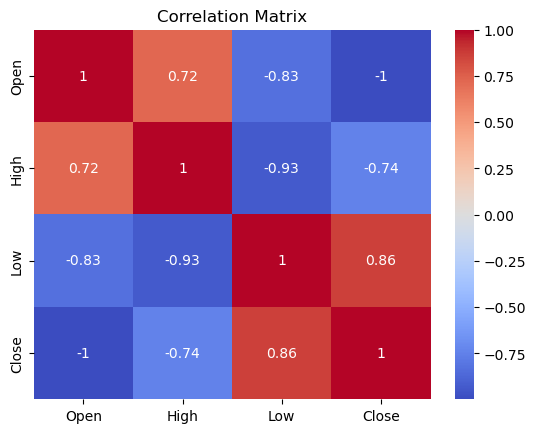

In [22]:
l1 = df[["Open","High","Low","Close"]].corr()
sns.heatmap(l1.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

3) Multivariate Analysis
Uncover relation between three or more variables

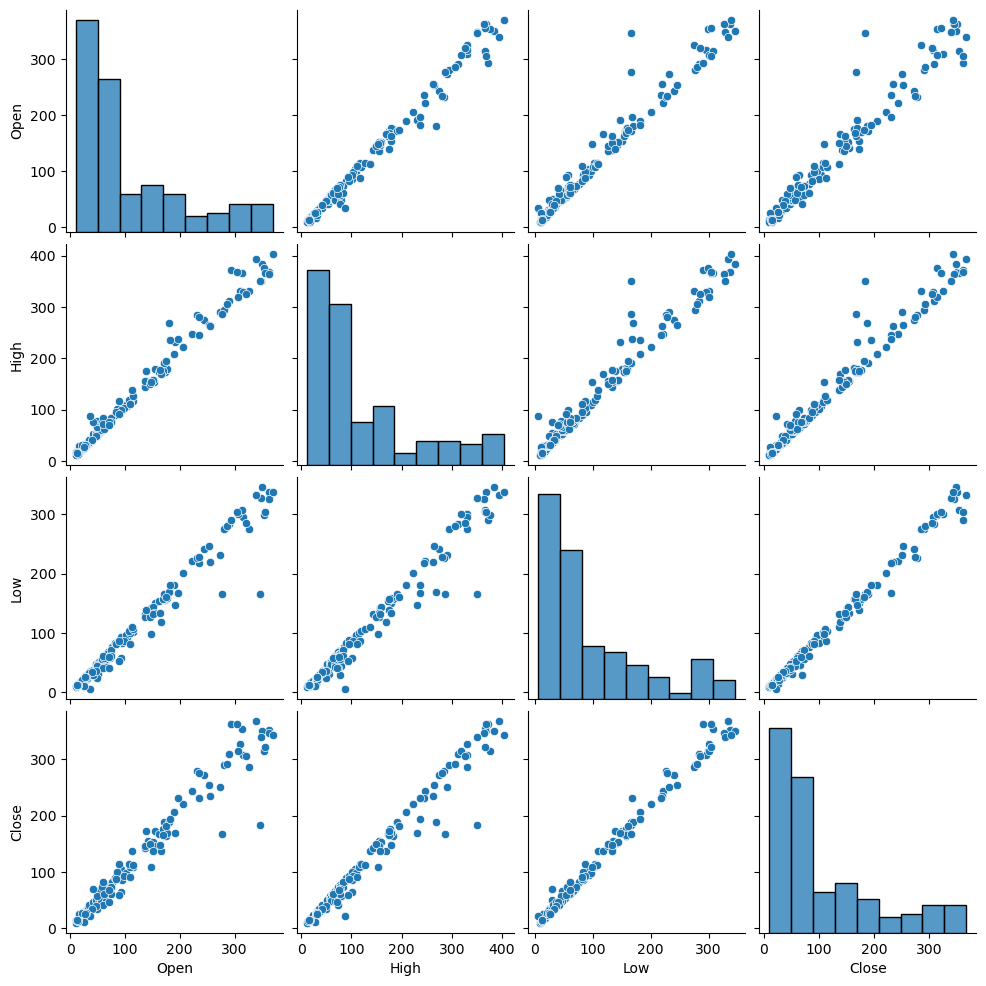

In [23]:
sns.pairplot(df[["Open","High","Low","Close"]])
plt.show()

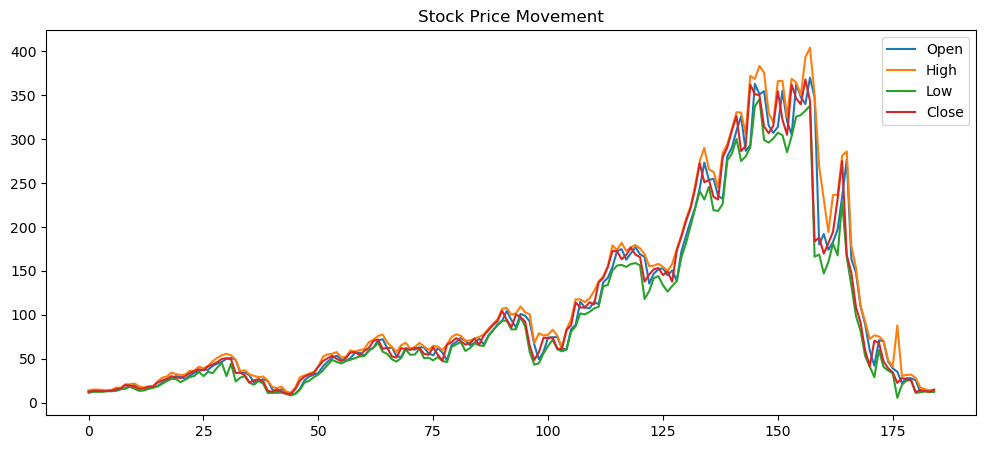

In [24]:
df[["Open","High","Low","Close"]].plot(figsize=(12,5))
plt.title("Stock Price Movement")
plt.show()

In [25]:
correlation = df[["Open","High","Low","Close"]].corr()
correlation

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


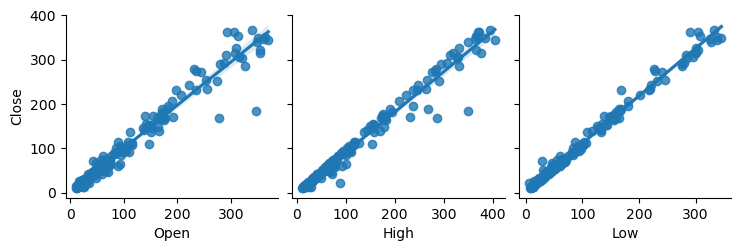

In [26]:
sns.pairplot(df,x_vars=["Open","High","Low"],y_vars="Close",kind='reg')

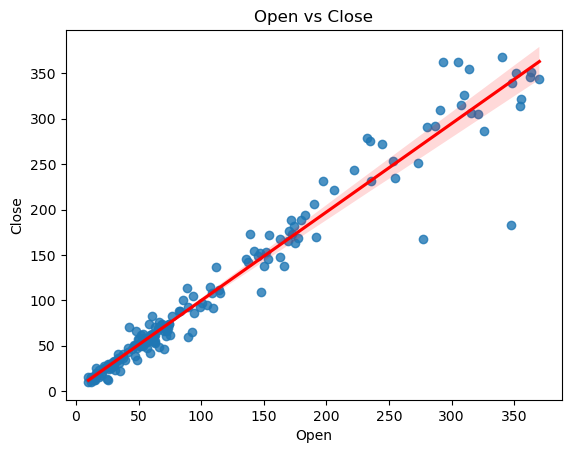

In [27]:
sns.regplot(x="Open",y="Close",data=df,line_kws={'color':'red'})
plt.title("Open vs Close")
plt.show()

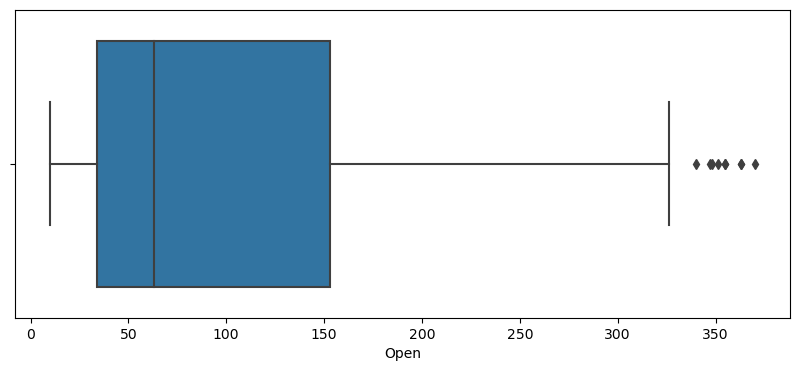

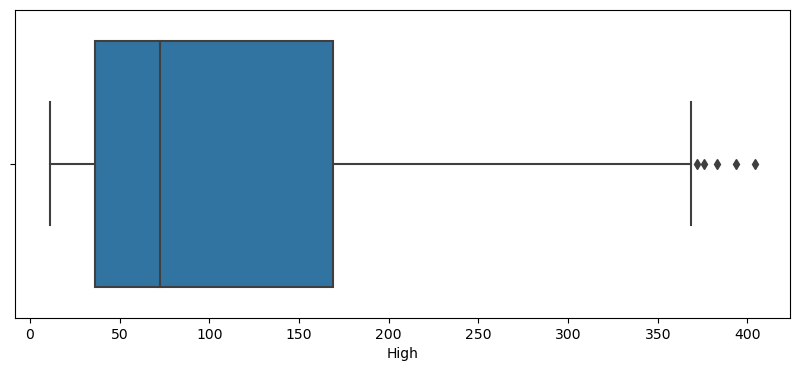

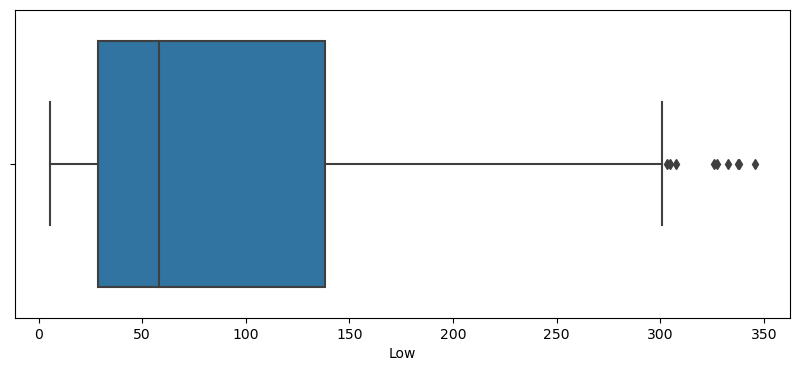

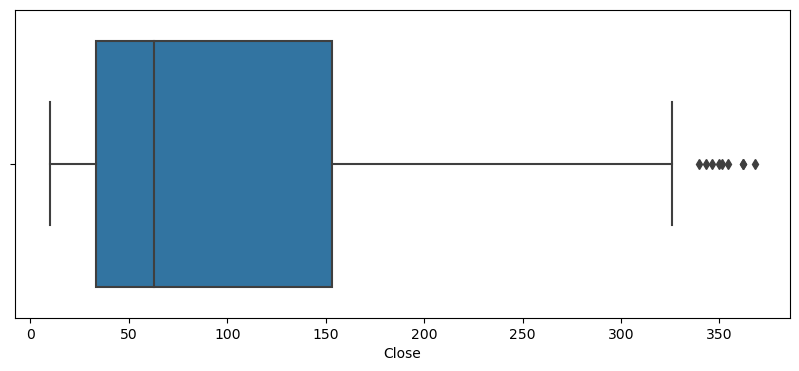

In [28]:
col = df[["Open", "High", "Low","Close"]]
for i in col:
    plt.figure(figsize = (10,4))
    sns.boxplot(x = col[i])
    plt.show()

## Model Preparation

In [29]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [30]:
X = df.iloc[:,1:4]
X.head()

,Open,High,Low
0,13.00,14.00,11.25
1,12.58,14.88,12.55
2,13.48,14.87,12.27
3,13.20,14.47,12.40
4,13.35,13.88,12.88


In [31]:
y = df.iloc[:,-1]
y.head()

0    12.46
1    13.42
2    13.30
3    12.99
4    13.41
Name: Close, dtype: float64

In [32]:
dates = df["Date"]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

## Scaling Data

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Predicting the Result

In [37]:
y_pred = lr.predict(X_test)
y_pred

array([ 61.14198912, 142.85246651,  33.85470572,  91.23431501,
        80.1665339 , 108.10989185, 174.75893703,  35.68318413,
       167.63850525,  52.64004961,  72.01007227,  15.12430428,
       288.68225951,  65.79625846, 315.61865125,  20.50461728,
       106.56514553,  47.11381178,  96.40708628,  67.56578506,
       339.55737474, 105.29242249, 106.88944601,  68.48889198,
        57.56343178,  14.6335964 , 175.05612551,  60.24180108,
        91.06932425,  31.17737462,  15.66490357,  56.63270174,
        65.44544027,  38.53027955, 118.94555421,  50.03040068,
       218.59324536,  76.10262884,  13.55546309, 108.63180123,
        64.34101765,  15.13039114, 322.41690937, 153.88656879,
        49.01277913,  51.58229733, 306.34287049,  26.59648357,
        70.08451065,  17.29680069, 217.63426333, 168.54237858,
        15.34050148,  23.56761762,  26.73475489,  95.6305321 ])

In [38]:
y_train

121    137.90
67      51.29
153    362.05
165    168.00
58      57.57
        ...  
15      22.78
169     59.50
184     14.67
72      62.13
87      82.29
Name: Close, Length: 129, dtype: float64

## Accuracy

In [39]:
print("Trainig Score: ",(lr.score(X_train, y_train))*100,"%")
print("Testing Score: ",(lr.score(X_test, y_test))*100,"%")

Trainig Score:  99.5085039027744 %
Testing Score:  99.4795414906589 %


## Visualisation of the Predicted value and Actual value

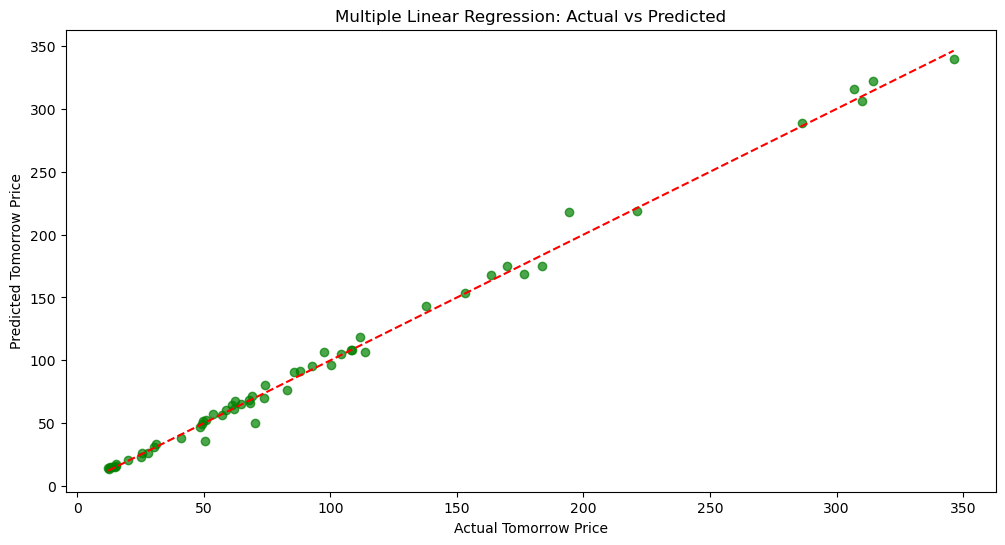

In [40]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Tomorrow Price')
plt.ylabel('Predicted Tomorrow Price')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()

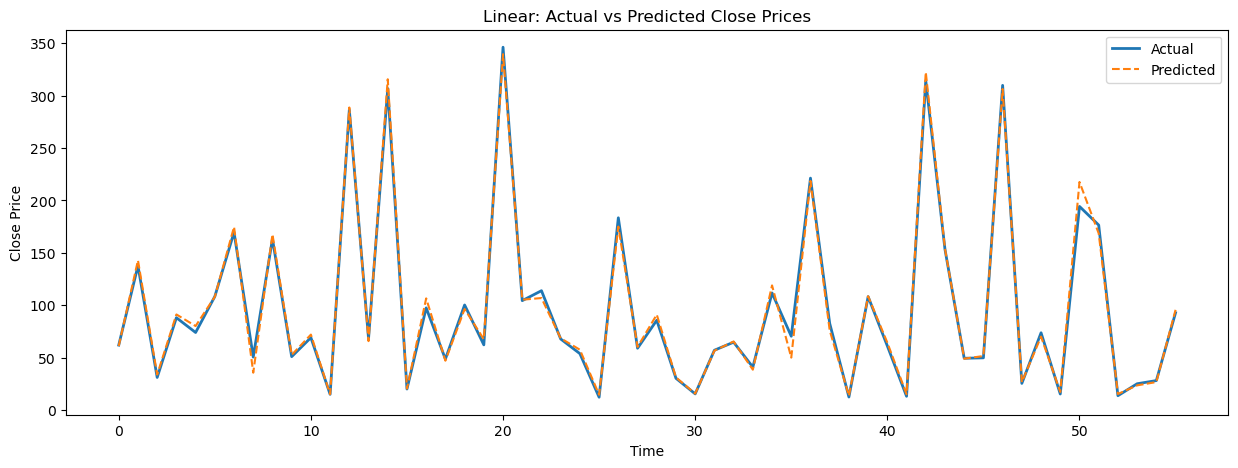

In [41]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Linear: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()

## Difference Between Actual and predicted value

In [42]:
result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
result.sample(10)

,Actual,Predicted,Difference
105,88.14,91.234315,-3.094315
57,57.10,56.632702,0.467298
160,169.65,174.758937,-5.108937
162,194.30,217.634263,-23.334263
100,73.74,70.084511,3.655489
83,67.83,68.488892,-0.658892
50,40.99,38.530280,2.459720
90,104.41,105.292422,-0.882422
116,163.31,167.638505,-4.328505
107,108.38,108.109892,0.270108


## Evaluation Metrics

In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 : ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE : ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE : ",mse)

rmse = np.sqrt(mse)
print("\nRMSE : ",rmse)


R2 :  0.994795414906589

MAE :  4.024871129142954

MSE :  36.725949589928135

RMSE :  6.060193857454408


## Decision Tree Regressor

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [45]:
y_pred = dtree.predict(X_test)
y_pred

array([ 70.3 ,  25.45,  31.93,  70.3 , 354.45,  18.03,  94.5 ,  49.42,
        10.26,  13.42,  71.86, 145.23,  12.26,  74.02, 343.4 , 108.21,
        74.02, 346.2 ,  73.74, 172.91, 234.28, 326.14,  71.86,  70.45,
        13.58, 306.8 ,  18.03, 168.6 ,  55.61,  74.02,  26.83,  25.32,
       149.38, 346.2 ,  39.2 , 172.55, 172.91, 346.2 ,  74.02, 275.05,
       234.28, 188.73,  61.02,  18.03, 165.74, 309.82,  55.61,  37.93,
       108.21,  60.95, 346.2 , 188.73,  57.57,  74.02, 172.55,  16.12])

## Accuracy

In [46]:
print("Trainig Score: ",(dtree.score(X_train, y_train))*100,"%")
print("Testing Score: ",(dtree.score(X_test, y_test))*100,"%")

Trainig Score:  100.0 %
Testing Score:  98.0799527734194 %


## Visualisation of actual vs predicted values

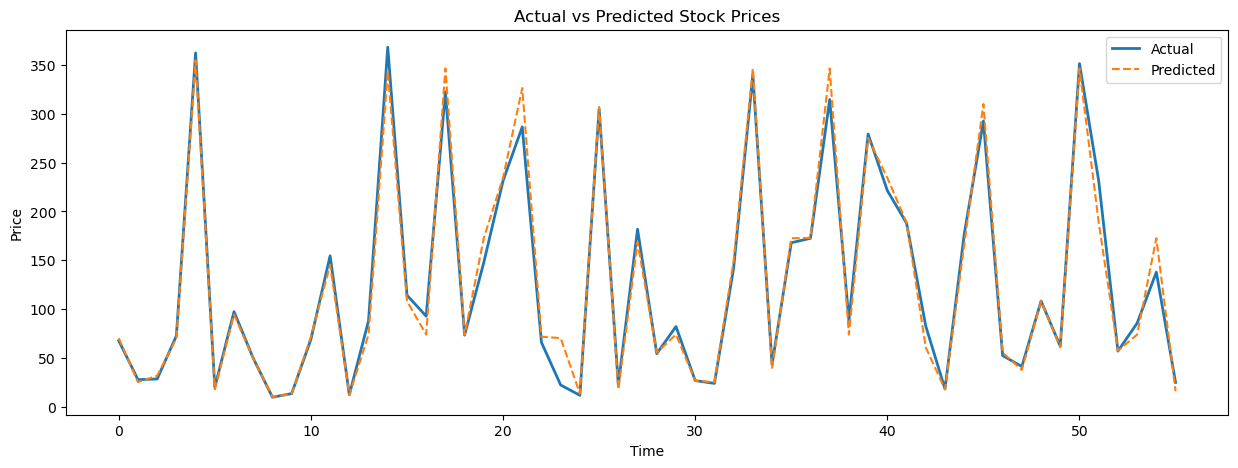

In [47]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

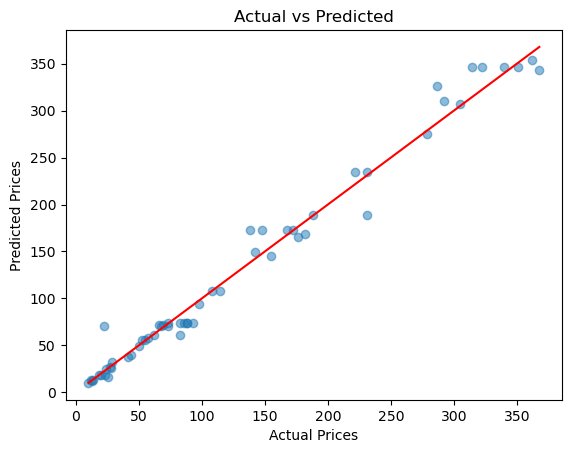

In [50]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()


### Difference between actual and predicted values

In [51]:
dtree_result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
dtree_result.sample(10)


,Actual,Predicted,Difference
176,22.45,70.45,-48.00
80,73.46,73.74,-0.28
8,20.08,18.03,2.05
83,67.83,70.30,-2.47
151,322.25,346.20,-23.95
166,147.95,172.91,-24.96
105,88.14,74.02,14.12
79,69.14,71.86,-2.72
17,26.97,26.83,0.14
38,24.13,25.32,-1.19


### Evaluation Metrics

In [53]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 : ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE : ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE : ",mse)

rmse = np.sqrt(mse)
print("\nRMSE : ",rmse)


R2 :  0.9807995277341939

MAE :  9.408928571428572

MSE :  223.04434285714282

RMSE :  14.934669157940622


# Random Forest Regressor

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
from sklearn.ensemble import RandomForestRegressor
ran_forest = RandomForestRegressor(n_estimators=10,random_state =0)
ran_forest.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [55]:
y_pred = ran_forest.predict(X_test)
y_pred


array([ 27.993,  38.678,  75.59 ,  60.668, 317.836,  69.895, 309.015,
       350.045,  69.844, 122.015, 151.906,  62.879,  12.38 ,  54.539,
       345.89 ,  68.419, 165.609,  70.585, 273.307, 144.097,  30.158,
        59.562, 172.971, 147.889,  18.483,  25.199, 140.21 , 238.679,
        33.565, 275.455, 169.734,  13.167, 330.807, 285.581,  33.391,
        35.362,  13.42 ,  73.835, 356.55 ,  70.816,  91.008,  56.277,
       186.188,  61.241,  67.543,  33.767,  52.892, 145.536, 300.482,
        14.567,  14.263,  17.619,  51.079,  50.003,  71.364,  40.758])

## Accuracy

In [56]:
print("Trainig Score: ",(ran_forest.score(X_train, y_train))*100,"%")
print("Testing Score: ",(ran_forest.score(X_test, y_test))*100,"%")

Trainig Score:  99.78240363889257 %
Testing Score:  99.82054412907476 %


## Visualisation of Actual vs Predicted values

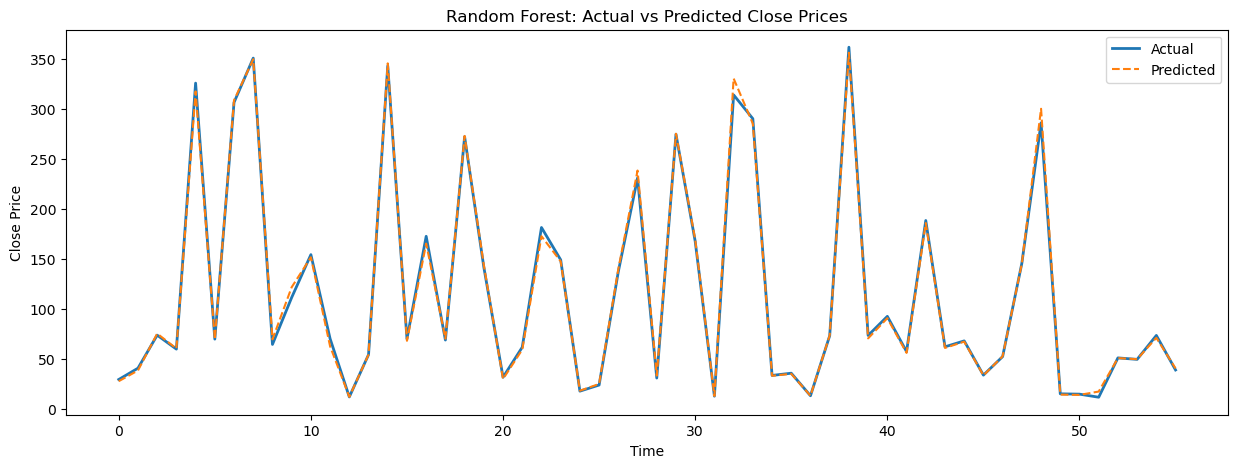

In [58]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Random Forest: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## Difference between actual and predicted values

In [60]:
rforest_result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
rforest_result.sample(10)

,Actual,Predicted,Difference
128,172.91,165.609,7.301
29,49.81,50.003,-0.193
81,70.07,69.895,0.175
71,62.38,61.241,1.139
99,73.76,71.364,2.396
80,73.46,73.835,-0.375
164,275.05,275.455,-0.405
48,31.93,30.158,1.772
58,57.57,56.277,1.293
174,39.20,40.758,-1.558


## Evaluation Metrics

In [61]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 : ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE : ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE : ",mse)

rmse = np.sqrt(mse)
print("\nRMSE : ",rmse)


R2 :  0.9982054412907476

MAE :  2.782232142857142

MSE :  19.681189874999973

RMSE :  4.436348709806294


# SVM- Support Vector Machine

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

svr_model.fit(X_train, y_train)

SVR(C=100)

In [63]:
y_pred = svr_model.predict(X_test)

print("Trainig Score: ",(svr_model.score(X_train, y_train))*100,"%")
print("Testing Score: ",(svr_model.score(X_test, y_test))*100,"%")

Trainig Score:  99.47614285016539 %
Testing Score:  96.48412660068186 %


## Visualisation of Actual vs Predicted values

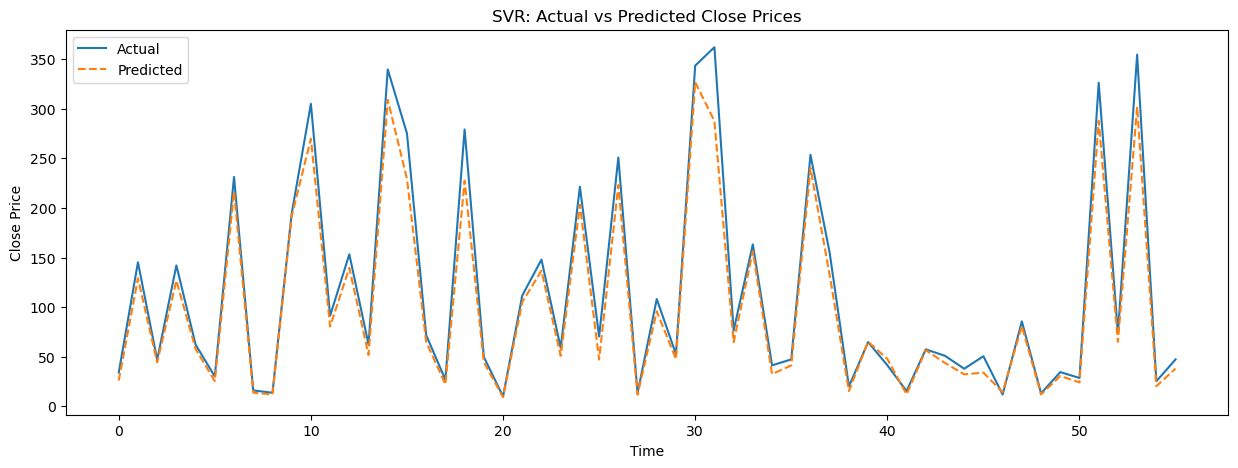

In [64]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('SVR: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

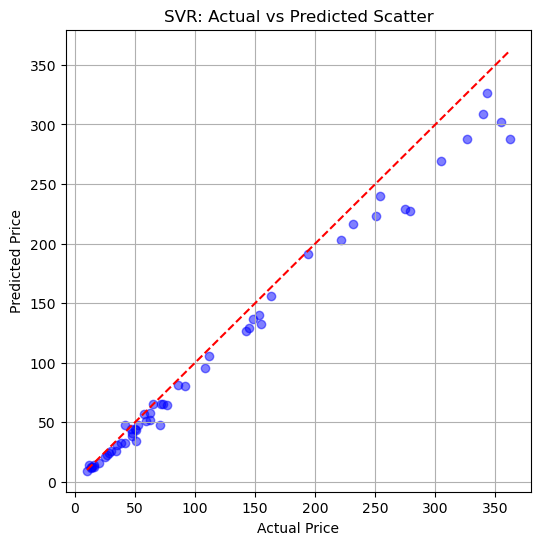

In [65]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.title('SVR: Actual vs Predicted Scatter')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

## Difference between actual and predicted values

In [66]:
SVM_result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
SVM_result.sample(5)

,Actual,Predicted,Difference
150,354.45,302.071205,52.378795
51,47.31,38.077011,9.232989
96,64.76,65.170464,-0.410464
116,163.31,156.337442,6.972558
24,37.93,32.306203,5.623797


## Evaluation Metrics

In [67]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 : ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE : ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE : ",mse)

rmse = np.sqrt(mse)
print("\nRMSE : ",rmse)


R2 :  0.9648412660068186

MAE :  13.159787877133896

MSE :  392.86939706698985

RMSE :  19.820933304640068


# K Nearest Neighbor

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [69]:
y_pred = knn_model.predict(X_test)

## Accuracy

In [70]:
print("Trainig Score: ",(knn_model.score(X_train, y_train))*100,"%")
print("Testing Score: ",(knn_model.score(X_test, y_test))*100,"%")

Trainig Score:  98.61763309917811 %
Testing Score:  97.25404521886408 %


## Visualisation of Actual vs Predicted values

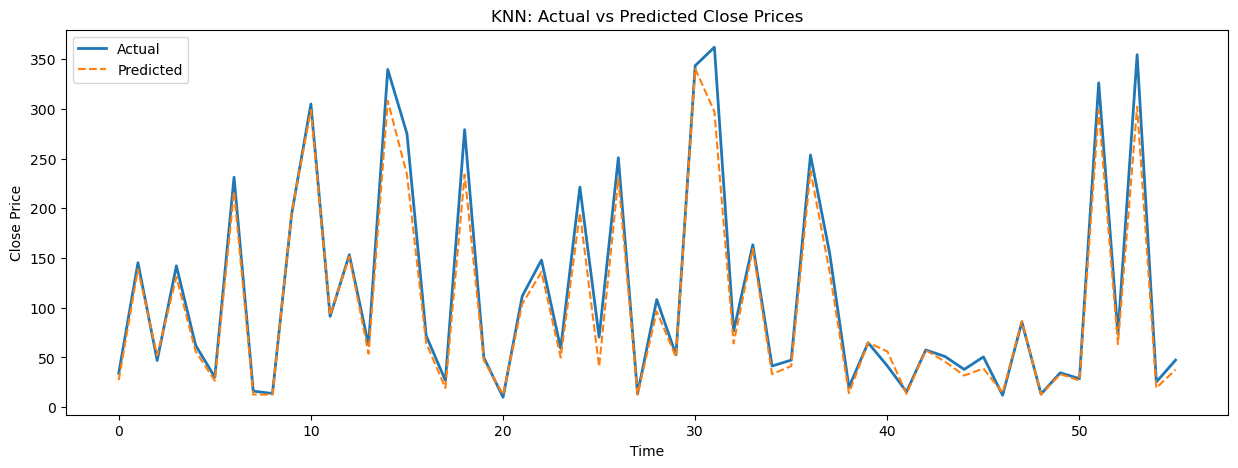

In [71]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('KNN: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

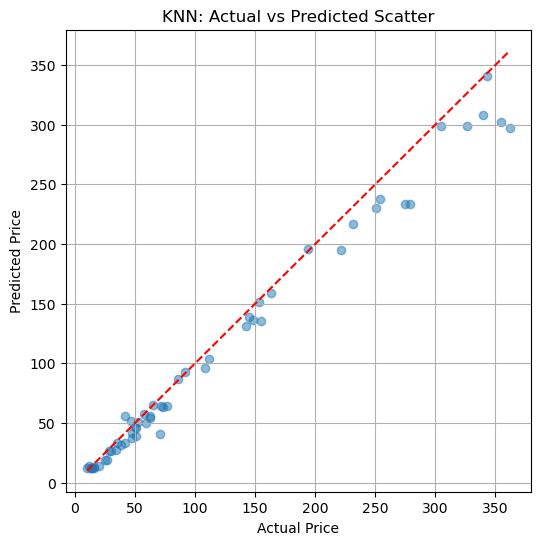

In [72]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN: Actual vs Predicted Scatter')
plt.grid(True)
plt.show()

## Difference between actual and predicted values

In [73]:
rforest_result = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Difference": y_test - y_pred
})
rforest_result.sample(10)

,Actual,Predicted,Difference
30,50.54,38.882,11.658
171,70.45,40.720,29.730
26,41.36,33.200,8.160
63,71.86,64.446,7.414
125,145.23,138.698,6.532
55,47.32,41.368,5.952
135,253.52,237.574,15.946
80,73.46,63.388,10.072
44,9.98,12.646,-2.666
131,221.30,195.334,25.966


## Evaluation Metrics

In [74]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("\nR2 : ",r2)

mae = mean_absolute_error(y_test, y_pred)
print("\nMAE : ",mae)

mse = mean_squared_error(y_test, y_pred)
print("\nMSE : ",mse)

rmse = np.sqrt(mse)
print("\nRMSE : ",rmse)


R2 :  0.9725404521886408

MAE :  11.197928571428571

MSE :  306.8374417142857

RMSE :  17.51677600799547


# Cross Validation for All Models

In [75]:
from sklearn.model_selection import cross_val_score

print("\nLinear Regression:")
print("Training cross validation score: ",round(((cross_val_score(lr, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(lr, X_test, y_test)).mean())*100,2))

print("\nDecision Tree Regressor: ")
print("Training cross validation score: ",round(((cross_val_score(dtree, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(dtree, X_test, y_test)).mean())*100,2))

print("\nRandom Forest Regressor: ")
print("Training cross validation score: ",round(((cross_val_score(ran_forest, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(ran_forest, X_test, y_test)).mean())*100,2))

print("\nSupport Vector Machine: ")
print("Training cross validation score: ",round(((cross_val_score(svr_model, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(svr_model, X_test, y_test)).mean())*100,2))

print("\nK Nearest Neighbor: ")
print("Training cross validation score: ",round(((cross_val_score(knn_model, X_train, y_train)).mean())*100,2))
print("Testing cross validation score: ",round(((cross_val_score(knn_model, X_test, y_test)).mean())*100,2))


Linear Regression:
Training cross validation score:  99.24
Testing cross validation score:  99.16

Decision Tree Regressor: 
Training cross validation score:  98.48
Testing cross validation score:  97.14

Random Forest Regressor: 
Training cross validation score:  98.04
Testing cross validation score:  98.08

Support Vector Machine: 
Training cross validation score:  98.97
Testing cross validation score:  98.62

K Nearest Neighbor: 
Training cross validation score:  97.09
Testing cross validation score:  97.81


# Conclusion

 In this project, 
we developed a regression-based predictive model to forecast the closing stock prices of
Yes Bank using historical financial data.


The Random Forest Regressor provided the best performance among all models 
with the highest R² score and lowest error metrics.

The model captures overall trends well but may not be ideal for short-term trading due to market volatility and non-quantitative factors.

Proper feature engineering and adding external factors (news sentiment, macro indicators) could improve accuracy further.

